--- Simulation Results ---
Steady-State Mean (x_ss):
[[2.56073223]
 [5.06660954]]

Steady-State Covariance (P_ss):
[[2.88317084 3.07873679]
 [3.07873679 7.96183057]]


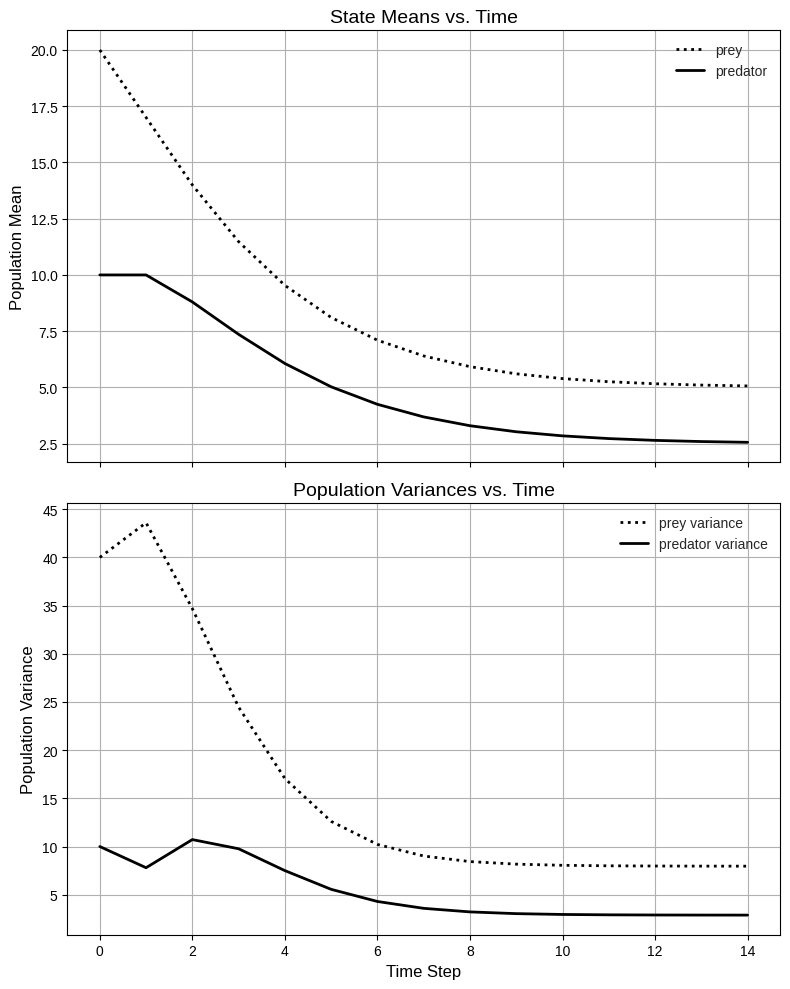

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_system(F, G, Q, x0, P0, u, num_steps):
    """
    Simulates the propagation of state mean and covariance for a linear system.

    Args:
        F (np.ndarray): State transition matrix.
        G (np.ndarray): Control matrix.
        Q (np.ndarray): Process noise covariance matrix.
        x0 (np.ndarray): Initial state mean.
        P0 (np.ndarray): Initial state covariance.
        u (np.ndarray): Constant control input.
        num_steps (int): The number of time steps to simulate.

    Returns:
        tuple: A tuple containing:
            - x_history (list): History of the state mean vectors.
            - p_history (list): History of the state covariance matrices.
    """
    # Initialize history lists with the starting conditions
    x_history = [x0]
    p_history = [P0]

    # Get current state and covariance
    x_k = x0
    P_k = P0

    # Run the simulation loop
    for _ in range(num_steps):
        # --- This is the Kalman Filter "Predict" Step ---
        # 1. Predict the next state mean
        x_k = F @ x_k + G @ u

        # 2. Predict the next state covariance
        P_k = F @ P_k @ F.T + Q
        # ---------------------------------------------

        # Store the results
        x_history.append(x_k)
        p_history.append(P_k)

    return x_history, p_history

if __name__ == '__main__':
    # 1. Define the System Model based on the example
    # State: [predator population, prey population]
    F = np.array([
        [0.2, 0.4],
        [-0.4, 1.0]
    ])

    G = np.array([
        [0],
        [1]
    ])

    # Process noise covariance Q
    Q = np.diag([1.0, 2.0])

    # Constant control input u (e.g., constant food supply for prey)
    u = np.array([[1]])

    # 2. Define Initial Conditions
    # Initial state estimate [10 predators, 20 prey]
    x_0 = np.array([
        [10.0],
        [20.0]
    ])

    # Initial covariance (uncertainty)
    P_0 = np.diag([10.0, 40.0])

    # 3. Run the Simulation
    num_simulation_steps = 14
    x_history, p_history = simulate_system(F, G, Q, x_0, P_0, u, num_simulation_steps)

    # 4. Extract Data for Plotting
    time_steps = range(num_simulation_steps + 1)

    # Extract predator and prey populations from the state history
    predator_mean = [x[0, 0] for x in x_history]
    prey_mean = [x[1, 0] for x in x_history]

    # Extract the variances (diagonal elements) from the covariance history
    predator_variance = [p[0, 0] for p in p_history]
    prey_variance = [p[1, 1] for p in p_history]

    # Print final steady-state values from the simulation
    print("--- Simulation Results ---")
    print(f"Steady-State Mean (x_ss):\n{x_history[-1]}\n")
    print(f"Steady-State Covariance (P_ss):\n{p_history[-1]}")


    # 5. Plot the Results
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True)
    plt.style.use('seaborn-v0_8-whitegrid')

    # Plot 1: State Means
    ax1.plot(time_steps, prey_mean, 'k:', linewidth=2, label='prey')
    ax1.plot(time_steps, predator_mean, 'k-', linewidth=2, label='predator')
    ax1.set_title('State Means vs. Time', fontsize=14)
    ax1.set_ylabel('Population Mean', fontsize=12)
    ax1.legend()
    ax1.grid(True)

    # Plot 2: State Variances
    ax2.plot(time_steps, prey_variance, 'k:', linewidth=2, label='prey variance')
    ax2.plot(time_steps, predator_variance, 'k-', linewidth=2, label='predator variance')
    ax2.set_title('Population Variances vs. Time', fontsize=14)
    ax2.set_ylabel('Population Variance', fontsize=12)
    ax2.set_xlabel('Time Step', fontsize=12)
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()